## 42577 Introduction to Business Analytics

# **Project: Airbnb rentals data exploration challange**

##  <span style='color:green'> 1. Introduction </span> <br>

***Group members:***

***Arlinda Driza - s223712***

***Alex Dadi Reynisson - s222551***

***Bergur Astradsson - s222545***

***Simona Tican - s204703***

***For this project we will investigate the Airbnb rentals data collected inside Copenhagen area. The analysis will mainly focus on rental prices. As a starting point, our aim is to predict wehther the price of a rental is either "high" or "low" as a binary classification, and "high", "med" and, "low" as a multi class classification. In order to solve these prediction problems we will be using Logistic Regression model on the dataset provided.***

##  <span style='color:green'> 2. Data analysis and Visualization </span> <br>

###  <span style='color:blue'> 2.1. Data Loading </span> <br>

In [159]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [160]:
# Read the dataset from the CSV file
dataset = pd.read_csv('listings.csv')

###  <span style='color:blue'> 2.2. Data Visualization </span> <br>

***Lets plot the dataset with the latitude and longitude coordinates.***

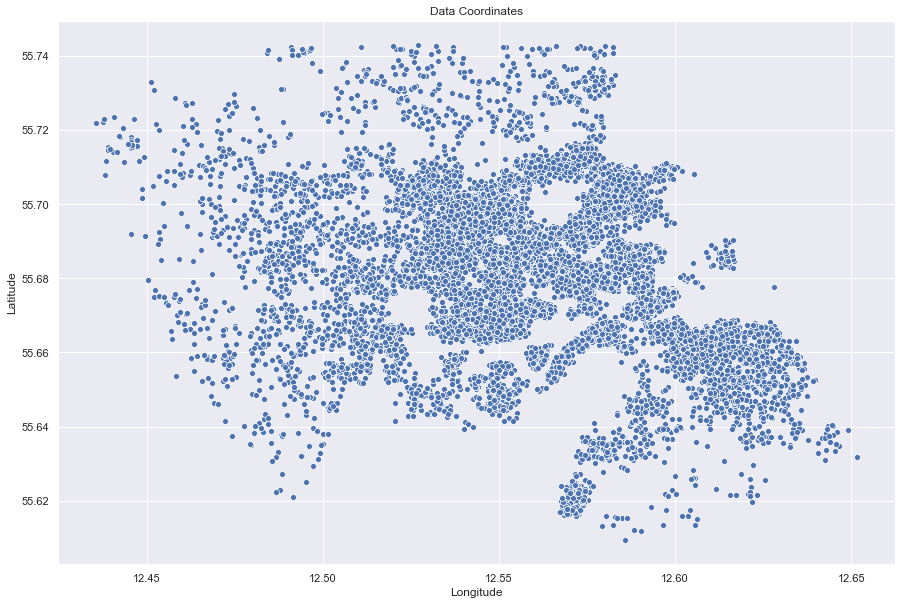

In [161]:
# Create scatter plot using latitude and longitude variables
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude)

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

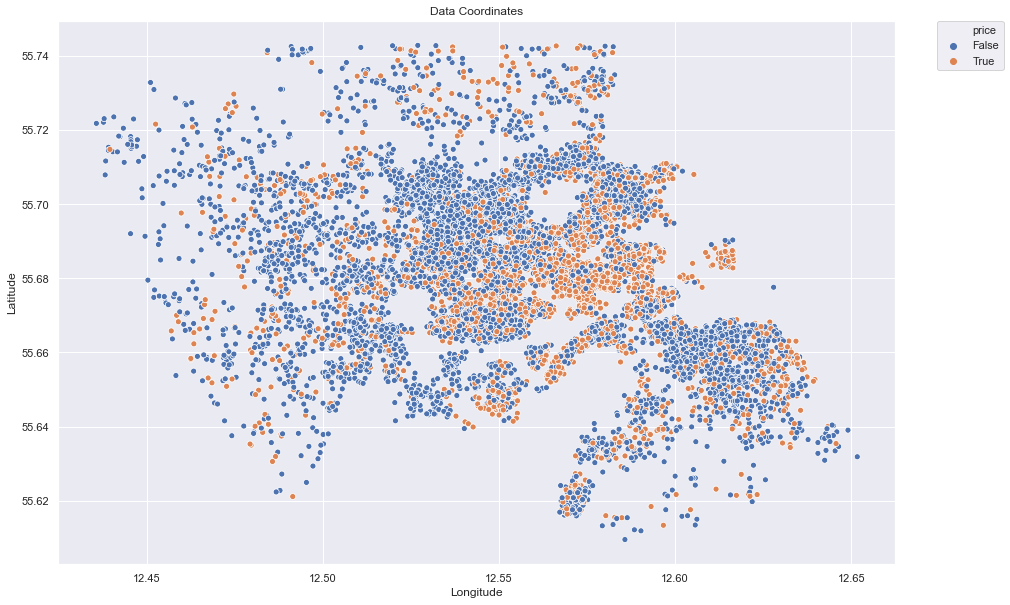

In [162]:
# Create scatter plot to classify the same variables into price below and above mean
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.price > dataset.price.mean())

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

***There is no obvious pattern for the coordinates whether the price is below or above the mean price.***

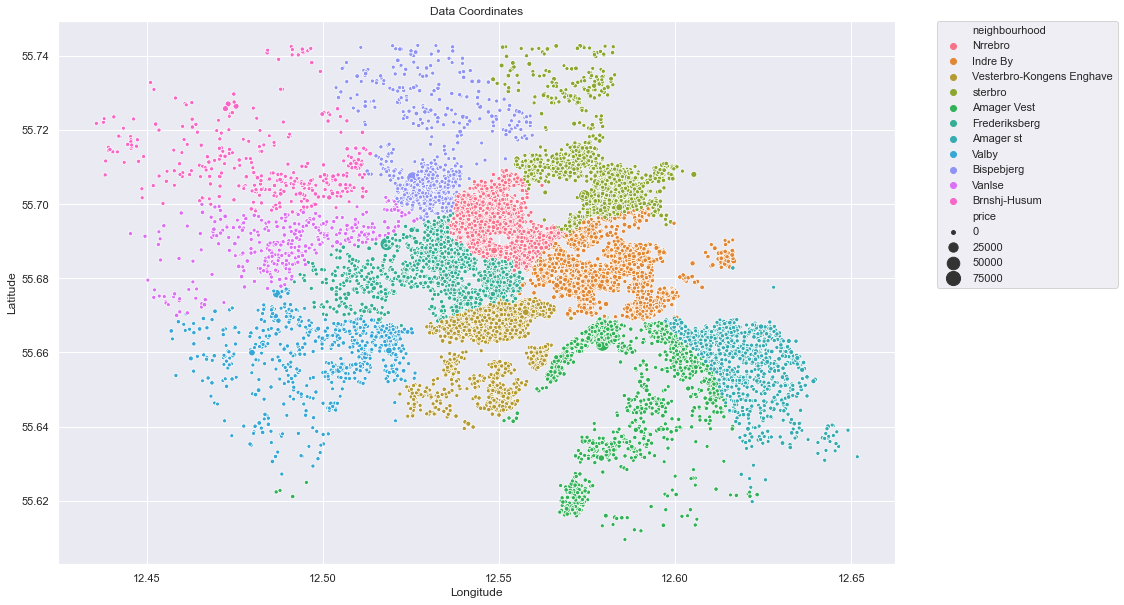

In [163]:
# Create scatter plot to classify the same variables into neighborhood and represent the price as varying points
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.neighbourhood,
    size = dataset.price, sizes = (15, 200))

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

***There is at leats one listing in each neighborhood that has a price of at least 25000.***

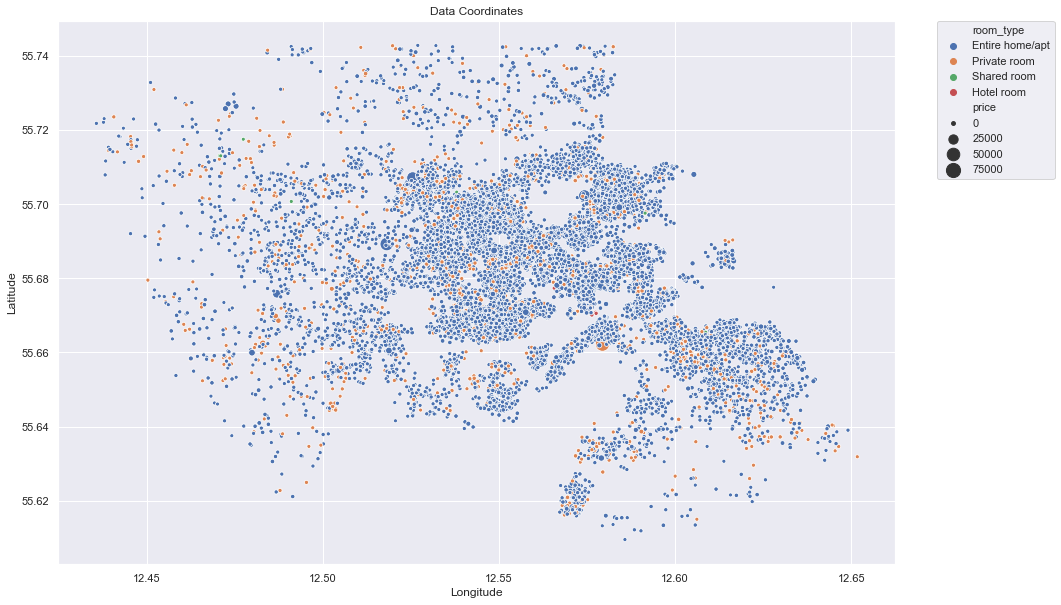

In [164]:
# Create scatter plot to classify the same variables into room type and represent the price as varying points
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot( 
    x = dataset.longitude, 
    y = dataset.latitude,
    hue = dataset.room_type,
    size = dataset.price, sizes = (15, 200))

plt.title('Data Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

***Most of the listings are `Entire home/apt` type. Less than half are `Private room` and there is a very small number of `Shared room` and `Hotel room` listings.***

***Now let's take a look at the data distribution.***

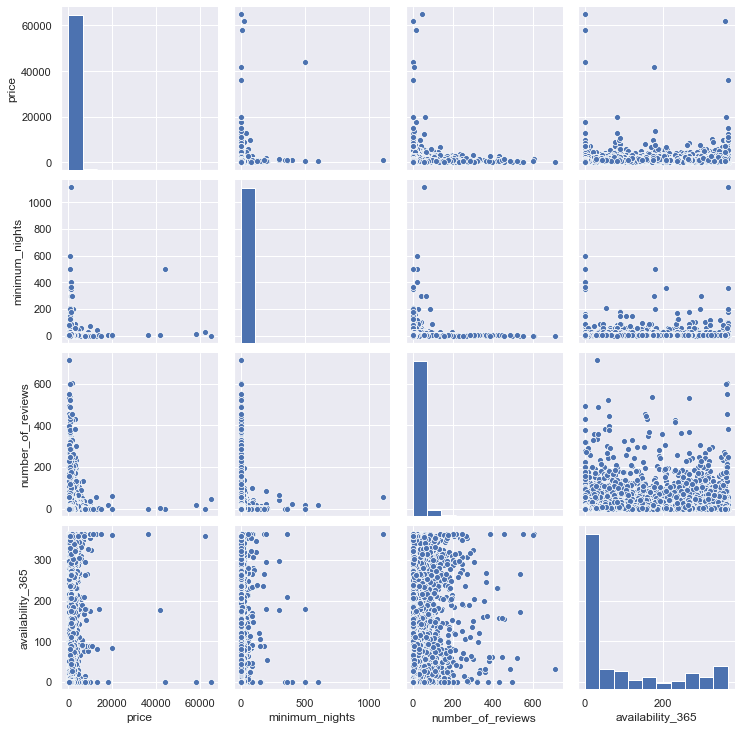

In [165]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.pairplot(dataset, vars=['price','minimum_nights', 'number_of_reviews', 'availability_365'])
plt.show()

In [166]:
# Categorize the number of listings based on the room type 
room_type_count = dataset.room_type.value_counts()
room_type_count

Entire home/apt    12230
Private room        1551
Shared room           19
Hotel room            15
Name: room_type, dtype: int64

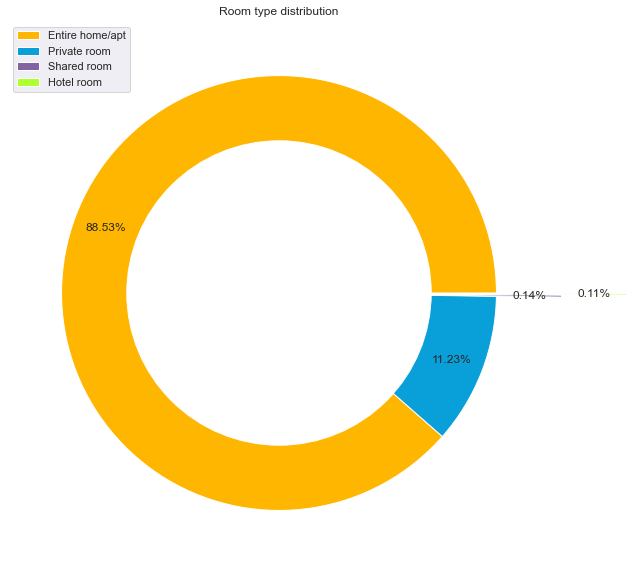

In [167]:
# Visualize the room type distribution 
explode = (0, 0, 0.3, 0.6)
colors = ['#FFB600', '#09A0DA','#8464a0', '#ADFF2F']

# Pie Chart
plt.pie(room_type_count, colors=colors,
        autopct='%.2f%%', pctdistance=0.85,
        explode=explode)
plt.legend(room_type_count.index, loc = "upper left")
plt.title("Room type distribution")

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

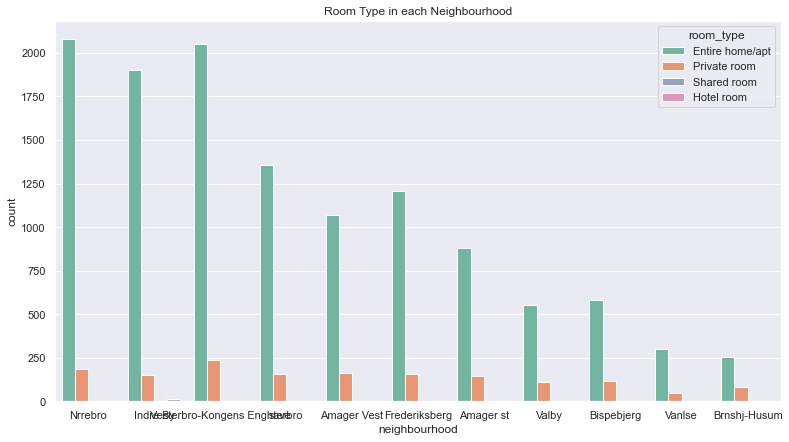

In [168]:
#Visualization of the room types in each neighbourhood
import seaborn as sns 
plt.figure(figsize=(13,7))
plt.title("Room Type in each Neighbourhood")
sns.countplot(dataset.neighbourhood,hue=dataset.room_type, palette="Set2")
plt.show()

***In each neighbourhood the most available type of room is entire home/apartment. In `Norrebro`, `Indre By` and `Vesterbro` have the most of them and they are around 2000 in each.***

In [169]:
# Analyzing the price in different neighbourhood for different room types
price_scale = dataset.groupby(['neighbourhood','room_type']).price.mean()
price_scale

neighbourhood              room_type      
Amager Vest                Entire home/apt    1408.319288
                           Private room       1002.624242
                           Shared room        1051.500000
Amager st                  Entire home/apt    1115.591116
                           Hotel room         1296.000000
                           Private room        612.090909
                           Shared room        1567.500000
Bispebjerg                 Entire home/apt     983.137457
                           Private room        485.217391
                           Shared room         198.000000
Brnshj-Husum               Entire home/apt    1105.551587
                           Private room        440.024096
                           Shared room         295.500000
Frederiksberg              Entire home/apt    1293.370554
                           Private room        672.702532
Indre By                   Entire home/apt    1674.605152
                           Ho

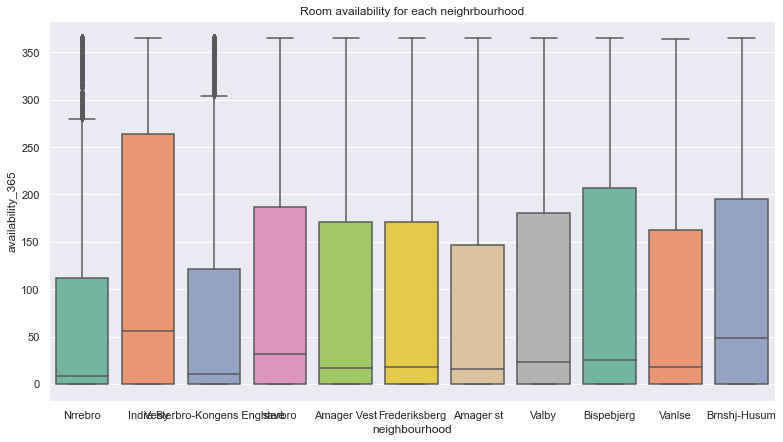

In [170]:
# Visualization of the room availability for each neighbourhood
plt.figure(figsize=(13,7))
plt.title("Room availability for each neighrbourhood")
sns.boxplot(data=dataset, x='neighbourhood',y='availability_365',palette="Set2")
plt.show()

***The `highest availability` of the rooms is observed in the `Intre By` neighbourhood (approximately 270 rooms available of any kind). The `lowest availability` is found in `Norrebro` (approximately 110 rooms available of any kind)The `highest availability` of the rooms is observed in the `Intre By` neighbourhood (approximately 270 rooms available of any kind). The `lowest availability` is found in `Norrebro` (approximately 110 rooms available of any kind).***

###  <span style='color:blue'> 2.3. Data Preprocessing </span> <br>

In [171]:
# Dispaly few variables
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,6983,26057,26473,29118,31094,32379,32841,33680,37159,38499
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse","165 m2 artist flat on Vesterbro, with 2 bathr...",Cozy flat for Adults/Quiet for kids,Best location on Vesterbro/Cph,Unique space on greatest location,0 min. from everything in Cph.
host_id,16774,109777,112210,125230,129976,140105,142143,145671,160390,122489
host_name,Simon,Kari,Julia,Nana,Ebbe,Lise,Anders & Maria,Mette,Jeanette,Christina
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,sterbro,Vesterbro-Kongens Enghave,Indre By,Indre By
latitude,55.6864,55.6931,55.676,55.6702,55.6666,55.6726,55.7118,55.6663,55.6855,55.6843
longitude,12.5474,12.5765,12.5754,12.555,12.5553,12.5525,12.5709,12.5456,12.5654,12.573
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954,1280,617,1000,2916,1900


In [172]:
# Retrive useful information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

In [173]:
# Observe wether null values are present
dataset.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

***We can observe that there are 5 columns containing null values. `host_name` column is missing one data point, `last_review` and `reviews_per_month`columns are missing 1645 data points. We can notice that column `neighbourhood_group` and `license` are containing no data points at all.***

***In order to remove the null values we are replacing them using mode and mean.***

In [174]:
# Replace missing values
dataset["host_name"].fillna(dataset["host_name"].mode()[0], inplace = True)
dataset["last_review"].fillna(dataset["last_review"].mode()[0], inplace = True)
dataset["reviews_per_month"].fillna(dataset["reviews_per_month"].mean(), inplace = True)

# Delete columns with no recordings and irrelevant data
del dataset["neighbourhood_group"]
del dataset["license"]
del dataset["name"]
del dataset["host_name"]

In [175]:
# Search for duplicate rows in the dataset 
duplicate_check = dataset["id"].duplicated()
duplicate_check

0        False
1        False
2        False
3        False
4        False
         ...  
13810    False
13811    False
13812    False
13813    False
13814    False
Name: id, Length: 13815, dtype: bool

In [176]:
duplicate_check = dataset["id"].duplicated().any()
duplicate_check

False

***All values in the printed boolean series are `False` which indicates that there are no duplicated  `id` values in our dataset. Each `id` value in the listing is unique.***

***Since we know that all the values in the `id` column are unique, we can set this column as an index for our dataset.***

In [177]:
dataset.set_index("id", inplace=True)
dataset.head().T

id,6983,26057,26473,29118,31094
host_id,16774,109777,112210,125230,129976
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19
last_review,2022-06-21,2022-08-09,2022-09-10,2022-08-04,2022-08-22
reviews_per_month,1.08,0.55,2.06,0.16,0.13


In [178]:
# Renaming column of dataset for better interpretation

dataset.rename(columns={'calculated_host_listings_count':'total_listings', 'availability_365':'availability_current_year', 'number_of_reviews_ltm':'reviews_current_year'}, inplace=True)
dataset.head().T

id,6983,26057,26473,29118,31094
host_id,16774,109777,112210,125230,129976
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19
last_review,2022-06-21,2022-08-09,2022-09-10,2022-08-04,2022-08-22
reviews_per_month,1.08,0.55,2.06,0.16,0.13


In [179]:
# Convert date object type to datetime
dataset['last_review'] = pd.to_datetime(dataset['last_review'], format='%Y-%m-%d')

***The row `last_review` represents the date when the AirBnb owner got his last review. For the values to be usable in the model, it would be more useful to convert them to `days_since_last_review`.***

In [180]:
max_date = dataset["last_review"].max()
dataset["last_review"] = (max_date - dataset["last_review"]).dt.days
new_col = {'last_review':'days_since_last_review'}

dataset.rename(columns=new_col, inplace=True)

In [181]:
dataset.head().T

id,6983,26057,26473,29118,31094
host_id,16774,109777,112210,125230,129976
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.6864,55.6931,55.676,55.6702,55.6666
longitude,12.5474,12.5765,12.5754,12.555,12.5553
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19
days_since_last_review,95,46,14,51,33
reviews_per_month,1.08,0.55,2.06,0.16,0.13


In [182]:
# Sort the dataset based on the price  
dataset = dataset.sort_values(by='price', ascending=True)

In [183]:
# Exclude the listing with 0 for price
dataset = dataset[dataset.price > 0]
dataset.head().T

id,39000504,41285362,48652028,47282476,51107459
host_id,25580883,116485169,225782385,247828624,412918036
neighbourhood,Nrrebro,Bispebjerg,Bispebjerg,Brnshj-Husum,Valby
latitude,55.6894,55.6999,55.7032,55.7184,55.6544
longitude,12.5626,12.536,12.5342,12.4848,12.5064
room_type,Private room,Entire home/apt,Private room,Private room,Private room
price,79,113,120,124,127
minimum_nights,1,1,1,90,7
number_of_reviews,28,0,0,0,2
days_since_last_review,9,6,6,6,390
reviews_per_month,0.77,0.903816,0.903816,0.903816,0.15


In [184]:
# Acces any record from the dataset
dataset.iloc[13812]

host_id                          59346390
neighbourhood                 Amager Vest
latitude                          55.6622
longitude                         12.5794
room_type                    Private room
price                               64900
minimum_nights                          1
number_of_reviews                      47
days_since_last_review                320
reviews_per_month                     0.6
total_listings                          1
availability_current_year               0
reviews_current_year                    4
Name: 11339117, dtype: object

***An interesting observation once accesing the recording for the most expensive listing is that it has a considerable number of reviews. This observation can lead to meaningful decisions in our further analysis.***

***Defining outliers is an essential part of the data preparation process. The outliers are the extreme values within the dataset. One way to spot the outliers is using the function `.describe()` which generates a statistical summary. Outliers in the column of price will influence the analysis so this is where we will focus on.***

In [185]:
#Statistical summary of the column price
dataset['price'].describe()

count    13813.000000
mean      1206.053573
std       1433.173437
min         79.000000
25%        729.000000
50%        995.000000
75%       1369.000000
max      64900.000000
Name: price, dtype: float64

***We can notice that the max value is 64900 which is a large number compare to the mean which is only 1205, this indicates that the max value is an outlier. So we decided to use a data visualization technique to spot the outliers in detail. 
Box plots are useful because they show minimum and maximum values, the median, and the interquartile range of the data.***

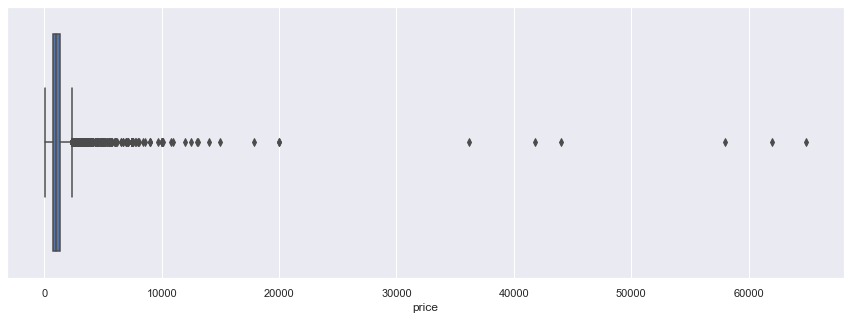

In [186]:
# Create a boxplot to idetify outliers for price
sns.set(rc={"figure.figsize":(15, 5)})
sns.boxplot(x = dataset["price"])
plt.show()

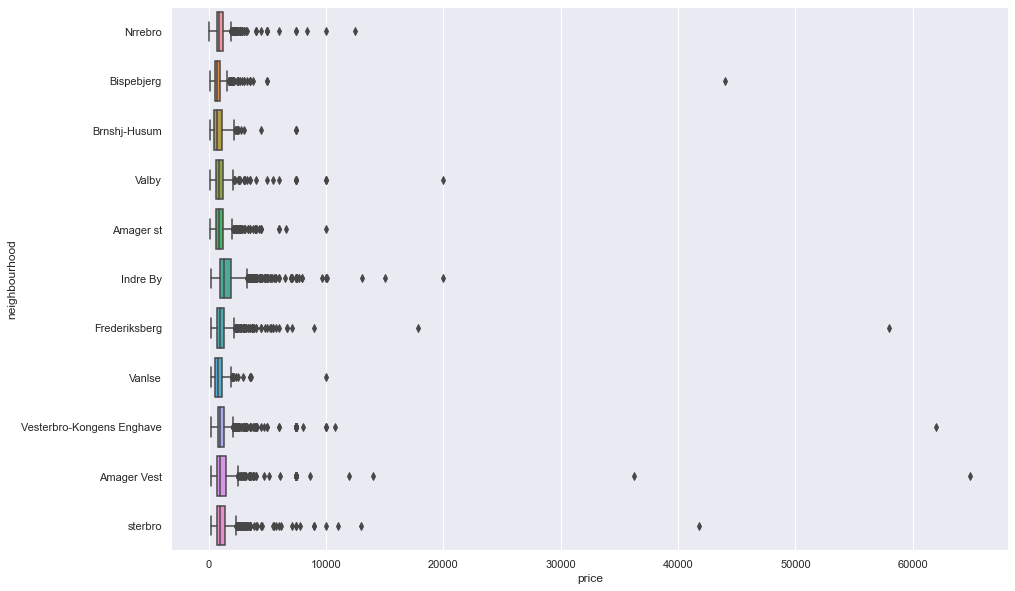

In [187]:
# Create multiple boxplots depending on neighbourhood areas
sns.set(rc={"figure.figsize":(15, 10)})
sns.boxplot(data=dataset, x="price", y="neighbourhood")
plt.show()

***There are 6 outlier easy to spot above the price of 20000. We already had an observation regarding the most expensive listing in our dataset, let's check the rest.***

In [188]:
outlier_2 = dataset.iloc[13811]
outlier_2

host_id                                       44675877
neighbourhood                Vesterbro-Kongens Enghave
latitude                                       55.6578
longitude                                      12.5619
room_type                              Entire home/apt
price                                            62000
minimum_nights                                      27
number_of_reviews                                    0
days_since_last_review                               6
reviews_per_month                             0.903816
total_listings                                       1
availability_current_year                          358
reviews_current_year                                 0
Name: 33108071, dtype: object

In [189]:
outlier_3 = dataset.iloc[13810]
outlier_3

host_id                             33025844
neighbourhood                  Frederiksberg
latitude                             55.6892
longitude                            12.5181
room_type                    Entire home/apt
price                                  58000
minimum_nights                            14
number_of_reviews                         16
days_since_last_review                   923
reviews_per_month                       0.23
total_listings                             1
availability_current_year                  0
reviews_current_year                       0
Name: 16397010, dtype: object

In [190]:
outlier_4 = dataset.iloc[13809]
outlier_4

host_id                             83120126
neighbourhood                     Bispebjerg
latitude                             55.7071
longitude                            12.5255
room_type                    Entire home/apt
price                                  44000
minimum_nights                           500
number_of_reviews                          1
days_since_last_review                   771
reviews_per_month                       0.04
total_listings                             1
availability_current_year                  0
reviews_current_year                       0
Name: 44224836, dtype: object

In [191]:
outlier_5 = dataset.iloc[13808]
outlier_5

host_id                             70535897
neighbourhood                        sterbro
latitude                             55.7023
longitude                            12.5743
room_type                    Entire home/apt
price                                  41800
minimum_nights                             3
number_of_reviews                          5
days_since_last_review                   404
reviews_per_month                       0.19
total_listings                             2
availability_current_year                177
reviews_current_year                       0
Name: 44226456, dtype: object

In [192]:
outlier_6 = dataset.iloc[13807]
outlier_6

host_id                            329937265
neighbourhood                    Amager Vest
latitude                             55.6587
longitude                            12.5686
room_type                    Entire home/apt
price                                  36200
minimum_nights                             5
number_of_reviews                          0
days_since_last_review                     6
reviews_per_month                   0.903816
total_listings                             1
availability_current_year                365
reviews_current_year                       0
Name: 41764565, dtype: object

***The are all of type `Entire home/apt`. `outlier_2`, based on the listing name is not available anymore. `outlier_3` and `outlier_5` have more than one review and a resonable `minimum_nights` stay. Others either have 0 reviews or a very high `minimum_nights` number. It can be concluded that some of the recordings from outliers can corrupt our dataset, but they can't be absolutely neglected. Therefore, we will proceed with two datasets, one with and without the outliers.***

In [193]:
# Count the outliers that are above the 75% 
print("Number of outliers found above the 75%:")
len(dataset[dataset.price>1368.5])

Number of outliers found above the 75%:


3454

In [194]:
# Count the outliers that are below the 25% (we used the values shown from the statistical summary)
print("Number of outliers found below the 25%:")
len(dataset[dataset.price<729])

Number of outliers found below the 25%:


3447

In [195]:
# Calculate IQR point
Q1 = dataset["price"].quantile(0.25)
Q3 = dataset["price"].quantile(0.75)
IQR = Q3 - Q1
IQR

640.0

In [196]:
# Determine the baundaries
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [197]:
lower_lim

-231.0

In [198]:
upper_lim

2329.0

In [199]:
outlier_up = (dataset["price"] > upper_lim)

In [200]:
outlier_low = (dataset["price"] < lower_lim)

In [201]:
len(dataset["price"]) - (len(dataset["price"][outlier_low]) + len(dataset["price"][outlier_up]))

13037

In [202]:
dataset.shape

(13813, 13)

***As the numbers are indicating, we will lose 776 records if we drop the outliers.***

In [203]:
dataset["price"][outlier_low | outlier_up]

id
24957364               2341
11264667               2345
628252698168179533     2350
21187833               2350
604864099879521046     2350
                      ...  
44226456              41800
44224836              44000
16397010              58000
33108071              62000
11339117              64900
Name: price, Length: 776, dtype: int64

In [204]:
# Drop outliers
dataset2 = dataset[~(outlier_low | outlier_up)]

In [205]:
dataset2.shape

(13037, 13)

***Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in our dataset. That's why it is a good idea to review them.***

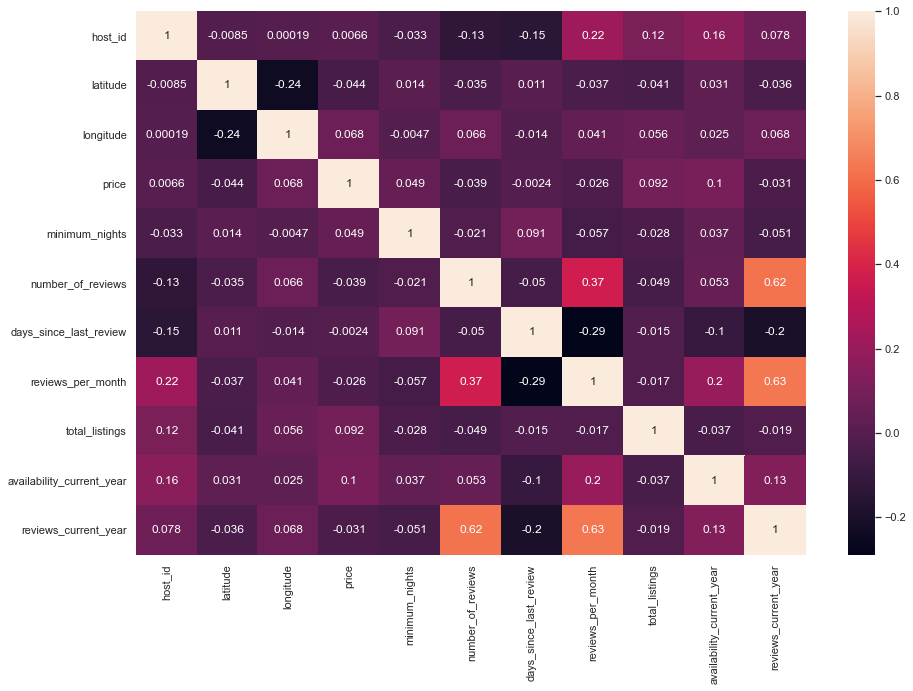

In [206]:
# Create correlation heat map for data with outliers
sns.set(rc={"figure.figsize":(15, 10)})
sns.heatmap(dataset.corr(), annot=True)
plt.show()

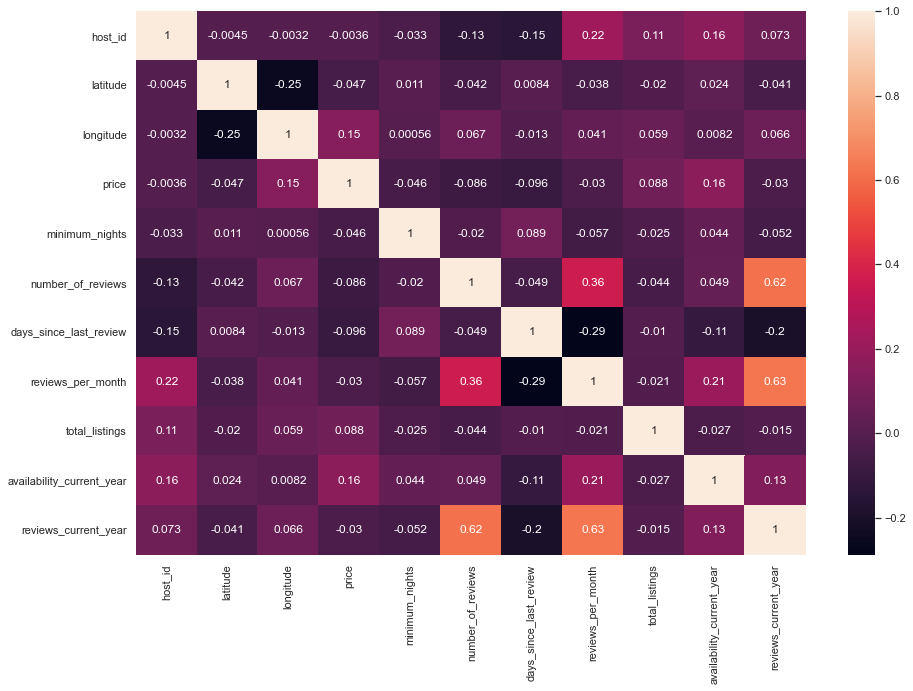

In [207]:
# Create correlation heat map for data without outliers
sns.set(rc={"figure.figsize":(15, 10)})
sns.heatmap(no_out_dataset.corr(), annot=True)
plt.show()

***Both heatmaps show that there are no strong correlations between the attributes of our datasets.***

***Now we should define value in order to determine wether the price is "low" or "high".***

In [208]:
price_threshold=np.percentile(dataset['price'], 75)
print(price_threshold)

1369.0


***How many listings are above 75th percentile?***

In [209]:
len(dataset[dataset.price>price_threshold])

3453

# <span style='color:green'> 3. Prediction Challange </span> <br>

###  <span style='color:blue'> 3.1. Binary Classification </span> <br>

Text(0, 0.5, 'Frequency')

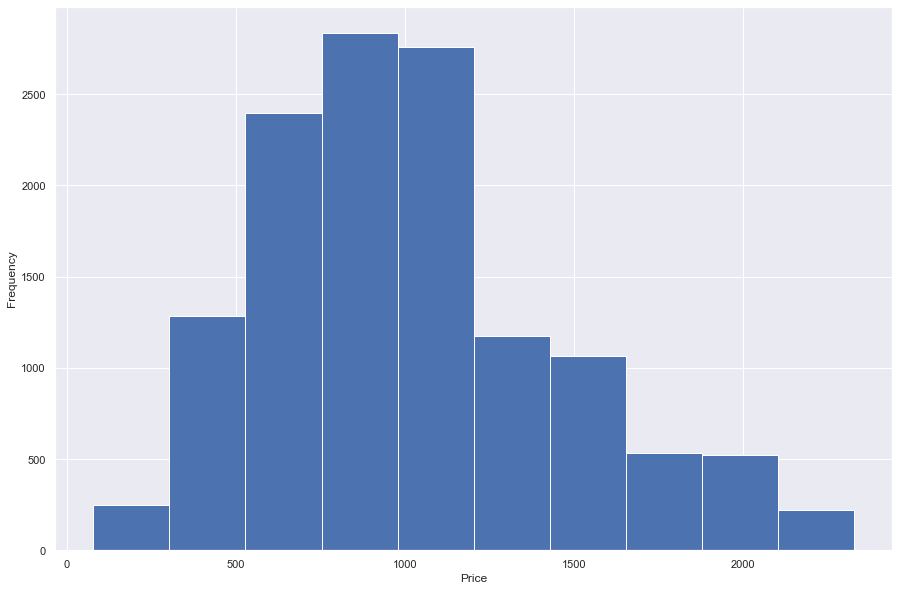

In [210]:
# Visualization of the new dataset after the outliers were removed
dataset2['price'].hist()
plt.xlabel("Price")
plt.ylabel("Frequency")

***This prediction model will be based on our new dataset after the outliers were removed. Further in the analysis, we will create a prediction model using the original dataset consisting the outliers, so we can compare and evalute the results.***

In [211]:
# Binary Classification
# Data preparation-prepare the target variable 
dataset2['p_price']=(dataset2['price'].apply(lambda x: x<=price_threshold)).astype(float)

# Make target variable
target=dataset2['p_price']

<ipython-input-211-df7e2536894c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['p_price']=(dataset2['price'].apply(lambda x: x<=price_threshold)).astype(float)


***For our prediction model as the `"high price" we set to be the the value of upper quartile of the plot box (75% : 1369.0)`.***

In [212]:
# Turn categorical and numerical columns into dummy variables in order to evaluate them further on 
features_col = ['neighbourhood', 'room_type','number_of_reviews','reviews_per_month']
features = pd.get_dummies(dataset2[features_col], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)

In [213]:
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, target, train_size=0.7)

In [214]:
# Building a Logistic Regression Model 
x_train_std = x_train.copy()
x_test_std = x_test.copy()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=14000)
lr.fit(x_train_std,y_train)

#Evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_lr))
print("F1-score is %f" % f1_score(y_test,y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy is 0.788599
F1-score is 0.879252
Confusion matrix:
[[  74  748]
 [  79 3011]]


***The accuracy is defined as the ratio of true positives and true negatives to all positive and negative observations. 
`In this model the accuracy is equal to 78% which represents the portion of the right predictions over the total predictions.` 
The accuracy rate is considered good, but it doesn’t show any possible errors our machine learning model makes on new data we haven’t seen before.**`

***The F1-score represents the model score as a function of precision and recall score. It is often used as a single value that provides high-level information about a model’s output quality. `In this model the F1-score is equal to 0.87 which is close to 1 (f1-score is considered perfect when it's 1).` Our F1-score it is considered as a good score which means that in this model there are low false positives and low false negatives predictions.***

***The confusion matrix is a summarized table assesing the performance of our classification model.
From row 2 of the table we can see that **3018 out of 3072 (54  + 3018) observations in class 1 are predicted correctly, which is a really good portion which it could also be seen in the good f1 score.***

In [215]:
# Checking the balance of our dataset 
# Fraction of observations with class 1
print("Class 1:")
print(len(dataset2[(dataset2['p_price']==1)])/len(dataset2))


# Fraction of observations with class 0
print("Class 0:")
print(len(dataset2[(dataset2['p_price']==0)])/len(dataset2))

Class 1:
0.79466134846974
Class 0:
0.20533865153026004


***The classes of the dataset are imbalanced, with around 80% of the rooms having a price lower or equal than the set "high price" and 20% of them being higher than that. Despite the fact that the accuracy and the F1-score were equally good, the F1 score is a better measure of the model performance when the dataset is imbalanced, since accuracy does not distinguish between the numbers of correctly classified examples of different classes.***

###  <span style='color:blue'> 3.2. Multi Class Classification </span> <br>

In [216]:
# Building a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dataset2 = DecisionTreeClassifier()

dataset2.fit(x_train_std, y_train)

# Make predictions from decision tree model
y_pred_dt = dataset2.predict(x_test_std)

# Evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_dt))
print("F1-score is %f" % f1_score(y_test,y_pred_dt))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_dt))

Accuracy is 0.711912
F1-score is 0.822324
Confusion matrix:
[[ 177  645]
 [ 482 2608]]


***Overall, the Logistic Regression performs slightly better with an F1 score of 0.87 compared to 0.82 for the Decision Tree. It is better at predicting the price range 3018/3072 compared to the 2638/3072 correctly predicted from the Decision tree. Τhe accuracy is lower than in the Logistic Regression equal to 72%, but as we already mentioned, we are dealing with an unbalanced dataset so we will not use accuracy as a quality estimator of the prediction model.***

In [217]:
# Calculating precision and recall for the Logistic Regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.801011
Recall is 0.974434


In [218]:
# Calculating precision and recall fro the Decission Tree 
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.801721
Recall is 0.844013


***Other metrics used for the evaluation of the performance of the prediction model is precision and recall. Precision represents how good the model is at predicting a specific category and recall how many times the model was able to detect a specific category.*** 

***Comparing the results, the Logistic Regression is still performing better than the Decission Tree, there is almost no difference in the values of **precision (0.79 vs 0.80). The recall value for each model is 0.98 and 0.85 respectively. The outcome confirms the previous results about the accuracy and the F1-score we got for each classifier.***

***We will repeat the same process using our original dataset containing the outliers and compare the performance of each model.***

Text(0, 0.5, 'Frequency')

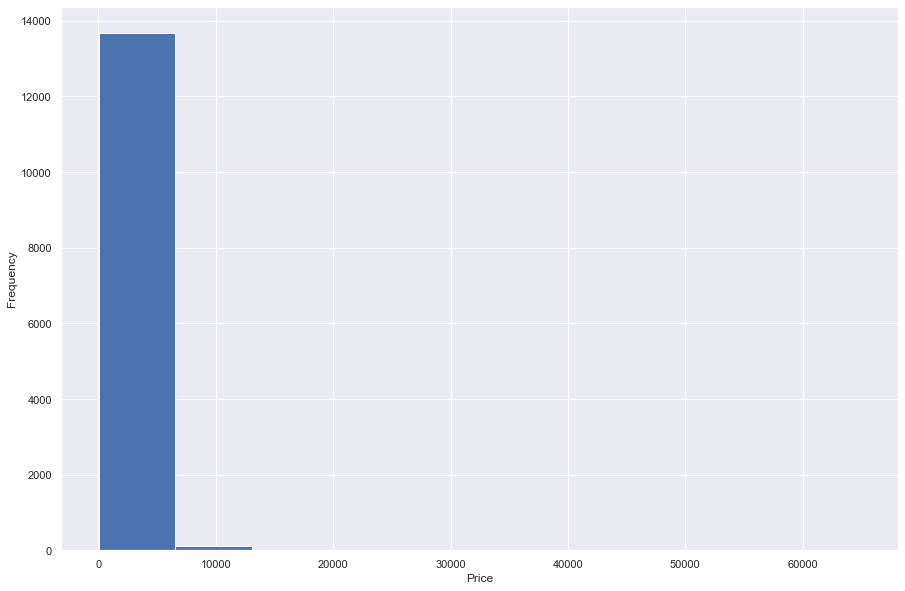

In [219]:
# Visualization of the new dataset after the outliers were removed
dataset['price'].hist()
plt.xlabel("Price")
plt.ylabel("Frequency")

In [220]:
print("Original dataset:", dataset.shape)

Original dataset: (13813, 13)


In [221]:
# Data preparation-prepare the target variable 
dataset['p_price']=(dataset['price'].apply(lambda x: x<=1369)).astype(float)

# Make target variable
target=dataset['p_price']

In [222]:
# Turn categorical and numerical columns into dummy variables in order to evaluate them further on 
features_col = ['neighbourhood', 'room_type','number_of_reviews','reviews_per_month']
features = pd.get_dummies(dataset[features_col], columns=['neighbourhood','room_type','reviews_per_month'], drop_first=True)

In [223]:
# Making the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, target, train_size=0.7)

In [224]:
# Building a Logistic Regression Model 
x_train_std = x_train.copy()
x_test_std = x_test.copy()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=14000)
lr.fit(x_train_std,y_train)

#Evaluate the performance of the classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# make predictions from Logistic regression model
y_pred_lr = lr.predict(x_test_std)

# evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_lr))
print("F1-score is %f" % f1_score(y_test,y_pred_lr))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy is 0.753620
F1-score is 0.852307
Confusion matrix:
[[ 177  804]
 [ 217 2946]]


In [225]:
# Checking the balance of our dataset 
# Fraction of observations with class 1
print("Class 1:")
print(len(dataset[(dataset['p_price']==1)])/len(dataset))


# Fraction of observations with class 0
print("Class 0:")
print(len(dataset[(dataset['p_price']==0)])/len(dataset))

Class 1:
0.7500180988923478
Class 0:
0.2499819011076522


In [226]:
# Building a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dataset2 = DecisionTreeClassifier()

dataset2.fit(x_train_std, y_train)

# Make predictions from decision tree model
y_pred_dt = dataset2.predict(x_test_std)

# Evaluate quality of predictions
print("Accuracy is %f" % accuracy_score(y_test,y_pred_dt))
print("F1-score is %f" % f1_score(y_test,y_pred_dt))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_dt))

Accuracy is 0.685811
F1-score is 0.795347
Confusion matrix:
[[ 312  669]
 [ 633 2530]]


In [227]:
# Calculating precision and recall for the Logistic Regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.785600
Recall is 0.931394


In [228]:
# Calculating precision and recall fro the Decission Tree 
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision is %f" %precision)
print("Recall is %f" %recall)

Precision is 0.790872
Recall is 0.799874


***Overall, even while using a database containing the outliers, the prediction models, both of them perfom really well. 
However, an improvement was observed in all of the metrics of the models.***

***In the Logistic Regression model the accuracy improved from 75% to 78%, the f1-score improved from 0.85 to 0.88, the precision and recall improved from 0.77 to 0.79 and from 0.94 to 0.98 respectively.*** 

***In the Decision Tree model the accuracy improved from 68% to 72%, the f1-score improved from 0.79 to 0.83, the precision and recall improved from 0.77 to 0.80 and from 0.80 to 0.86 respectively.***

***Outliers are influential only if they have a large impact on the regression equation. Specifically, Logistic Regression models are not much impacted due to the presence of outliers because the logistic sigmoid function tapers the outliers. Decision trees are also not sensitive to outliers or noisy data since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values. The above explains the reasons why there is not a large significant improvement of the metrics from the dataset containing the outliers.***

#  <span style='color:green'> 4. Exploratory Component </span> <br>

#  <span style='color:green'> 5. Conclusions </span> <br>

#  <span style='color:green'> 6. Contribution </span> <br>

<span style='color:red'> 1. Introduction and Data Analysis and Visualization - Arlinda and Simona </span> <br>

<span style='color:red'> 2. Prediction challange - Arlinda </span> <br>

<span style='color:red'> 3. Exploratory Component - Bergur and Alex </span> <br>